# Домашние задание по курсу Перенос Обучения
## Урок 3. Model as a service и разные применения Transfer learning

## Задание №1:

1. Объясняем работу примера style transfer (красивые примеры тут, colab)

## Задания из методички:

Реализуйте классификацию эмоциональной окрашенности текстов при помощи объекта pipeline.

1. Найдите тип задач Sentiment Analysis на huggingface.co
2. Найдите модель для русского языка (примеры: rubert-tiny2..., rubert-base...)

### Объясняем работу примера style transfer

In [2]:
# устанавливаем дифузии
pip install --upgrade diffusers transformers scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [13]:
# Импортируем модули
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from IPython.display import display

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

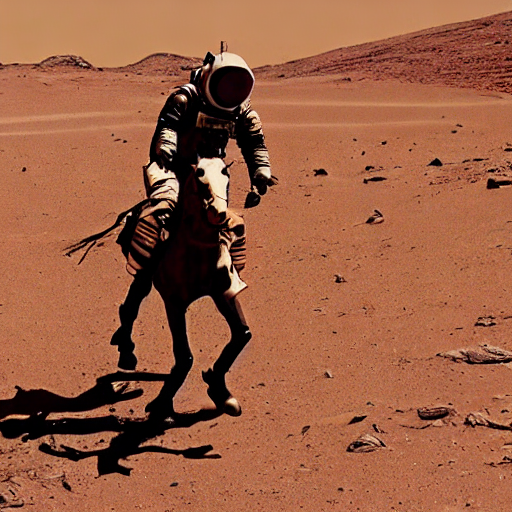

In [17]:
# Модель на которой будет выполняться генерация изображения и тип устройства на котором будут проводиться вычесления
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"
# Загрузка пайплайна и тип данных для работы с моделью
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)
# Оптимизируем использование памяти во время генерации изображений, делая процесс более эффективным на устройствах с ограниченной памятью
pipe.enable_attention_slicing()
# Задаём текст по которому будем генерировать изображение и количество изображений которое может вернуть модель
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

# Выводим изображение
display(image)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

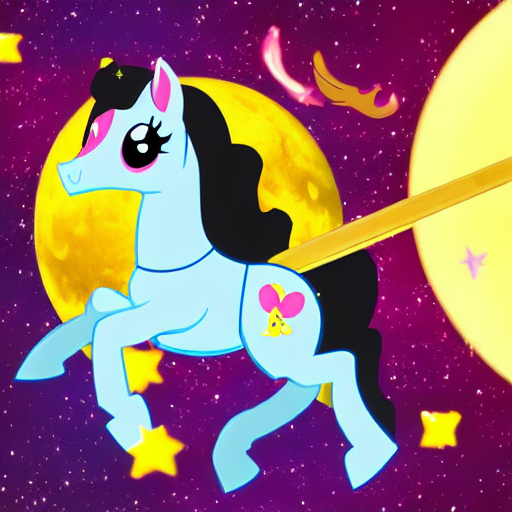

In [16]:
# Это тот же код что выше(выше представлен базовый код) но в нём мы поэксперементируем с найстройками и параметрами
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"
# Загрузка пайплайна и тип данных для работы с моделью
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe = pipe.to(device)
# Задаём текст по которому будем генерировать изображение и количество изображений которое может вернуть модель
prompt = "Photo of a pony princess riding on the planet Moon and eating a big juicy horse kebab"
image = pipe(prompt).images[0]

# Выводим изображение
display(image)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image 1:


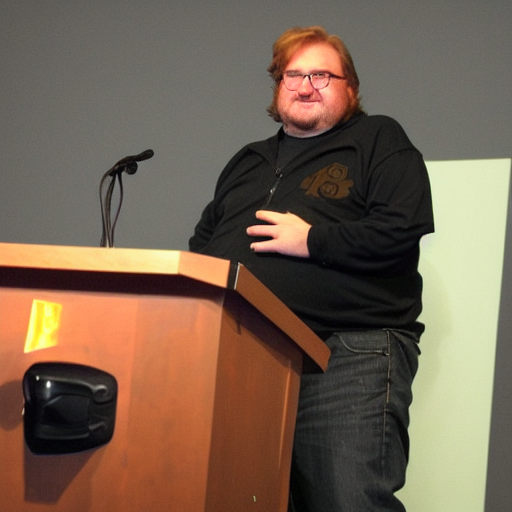

Image 2:


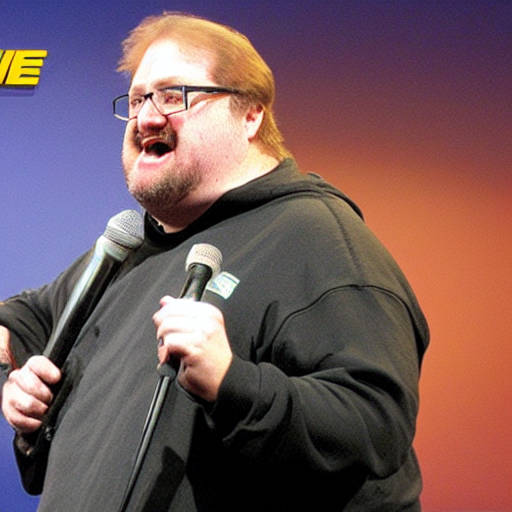

Image 3:


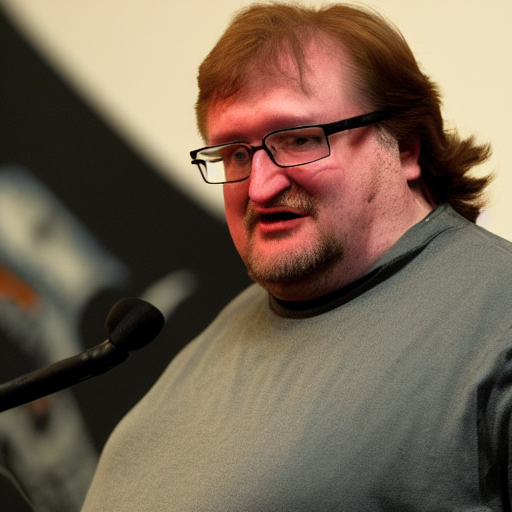

In [30]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
# Это тот же код что выше(выше представлен базовый код) но в нём мы поэксперементируем с найстройками и параметрами

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

# Загрузка пайплайна и тип данных для работы с моделью, заменяем планировщик шума
cheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float32)
pipe = pipe.to("cuda")

# Задаём текст по которому будем генерировать изображение и количество изображений которое может вернуть модель
prompt = "Photo of Gabe newell announcing game the Half-Life 3"
num_images = 3
images = pipe(prompt, num_images_per_prompt=num_images).images

# Вывод всех изображений
for i, img in enumerate(images):
    print(f"Image {i + 1}:")
    display(img)

### Реализуйте классификацию эмоциональной окрашенности текстов при помощи объекта pipeline.
- Найдите тип задач Sentiment Analysis на huggingface.co

In [31]:
# Импортируем модули
import transformers
from transformers import pipeline

In [32]:
# Инициализируем модуль pepline Rubert-base-rus-emotions (https://huggingface.co/seara/rubert-base-cased-ru-go-emotions)
classifier_emot = pipeline(model="seara/rubert-base-cased-ru-go-emotions")

config.json:   0%|          | 0.00/2.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/712M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/395 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.57M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [33]:
# Получаем относительно верные предсказания Rubert-rus-emotions
classifier_emot( ["Отличный товар",
            "Мне не понравилось",
            "Прекрасно выглядит, ничего не меняйте!",
            "Ничего не понял",
            "У меня не работала розетка, в остальном все отлично"] )

[{'label': 'admiration', 'score': 0.9238640666007996},
 {'label': 'neutral', 'score': 0.4071900248527527},
 {'label': 'admiration', 'score': 0.9382498860359192},
 {'label': 'neutral', 'score': 0.41783228516578674},
 {'label': 'amusement', 'score': 0.4031013250350952}]

In [34]:
# Получаем относительно верные предсказания Rubert-rus-emotions
classifier_emot ( ["Это плохо, что ничего неделается",
                   "хвосты плетутся и отягощают",
                   "когда меня оставят в покое?"] )

[{'label': 'disapproval', 'score': 0.42036107182502747},
 {'label': 'neutral', 'score': 0.8702496886253357},
 {'label': 'curiosity', 'score': 0.6289966106414795}]

In [35]:
# Инициализируем модуль pepline Bertweet-base-sentiment-analysis (https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis)
classifier_emot_eng = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [36]:
# Получаем относительно верные предсказания Bertweet-eng-emotions
classifier_emot_eng( ["Great product",
                  "I didn't like it",
                  "Looks great, don't change anything!",
                  "I didn't understand anything",
                  "My outlet didn't work, everything else is great"] )

[{'label': 'POS', 'score': 0.9848120212554932},
 {'label': 'NEG', 'score': 0.9592227339744568},
 {'label': 'POS', 'score': 0.9498449563980103},
 {'label': 'NEG', 'score': 0.9523448944091797},
 {'label': 'POS', 'score': 0.8790133595466614}]

In [37]:
# Получаем относительно верные предсказания Bertweet-eng-emotions
classifier_emot_eng( ["It's bad",
"and at the same time it's good that you have to pick it out by hand",
"where's my golden parachute?"] )

[{'label': 'NEG', 'score': 0.9659658670425415},
 {'label': 'POS', 'score': 0.8120388388633728},
 {'label': 'NEU', 'score': 0.9468176960945129}]

Найдите модель для русского языка (примеры: rubert-tiny2..., rubert-base...)

In [38]:
# Инициализируем модуль pepline Rubert-tiny2-rusRubert-tiny2-rus (https://translated.turbopages.org/proxy_u/en-ru.ru.a9e8045d-66d46ad8-79248f93-74722d776562/https/huggingface.co/seara/rubert-tiny2-russian-sentiment)
classifier_tiny2 = pipeline(model="seara/rubert-tiny2-russian-sentiment")

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [39]:
# Получаем относительно верные предсказания Rubert-tiny2-rus
classifier_tiny2( ["Отличный товар",
            "Мне не понравилось",
            "Прекрасно выглядит, ничего не меняйте!",
            "Ничего не понял",
            "У меня не работала розетка, в остальном все отлично"] )

[{'label': 'positive', 'score': 0.9941100478172302},
 {'label': 'neutral', 'score': 0.5911950469017029},
 {'label': 'positive', 'score': 0.9389205574989319},
 {'label': 'negative', 'score': 0.524005651473999},
 {'label': 'positive', 'score': 0.6734205484390259}]

In [40]:
# Получаем относительно верные предсказания Rubert-tiny2-rus
classifier_tiny2 ( ["Это плохо, что ничего неделается",
                   "хвосты плетутся и отягощают",
                   "когда меня оставят в покое?"] )

[{'label': 'negative', 'score': 0.7690396904945374},
 {'label': 'neutral', 'score': 0.7886109352111816},
 {'label': 'neutral', 'score': 0.9043183326721191}]

In [41]:
# Инициализируем модуль pepline Rubert-base-rus (https://huggingface.co/r1char9/rubert-base-cased-russian-sentiment)
classifier_base = pipeline(model="r1char9/rubert-base-cased-russian-sentiment")

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.57M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [42]:
# Получаем относительно верные предсказания Rubert-base-rus
classifier_base( ["Отличный товар",
            "Мне не понравилось",
            "Прекрасно выглядит, ничего не меняйте!",
            "Ничего не понял",
            "У меня не работала розетка, в остальном все отлично"] )

[{'label': 'positive', 'score': 0.9813413619995117},
 {'label': 'neutral', 'score': 0.6255875825881958},
 {'label': 'positive', 'score': 0.7293744087219238},
 {'label': 'negative', 'score': 0.7325770258903503},
 {'label': 'positive', 'score': 0.9165663719177246}]

In [43]:
# Получаем относительно верные предсказания Rubert-base-rus
classifier_base ( ["Это плохо, что ничего неделается",
                   "хвосты плетутся и отягощают",
                   "когда меня оставят в покое?"] )

[{'label': 'negative', 'score': 0.5154083967208862},
 {'label': 'neutral', 'score': 0.7648464441299438},
 {'label': 'neutral', 'score': 0.9671640992164612}]